<a target="_blank" href="https://colab.research.google.com/github/evaalonsoortiz/ELE8812-demos/blob/main/Demos/Lesson%204/Le%C3%A7on_4_Demo_conv.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# ELE8812 - Traitement fréquentiel

## Démo :  Mise en oeuvre de la convolution dans le domaine frequentiel

### Référence : DIP 4e édition, Chapitre 4, « FREQUENCY DOMAIN FILTERING FUNDAMENTALS » p.261

Dans ce démo, une image sera filtrée avec un filtre Sobel (voir le démo Leçon_7_sobel.ipynb) appliqué dans le domaine spatial et spectral. Un bourrage de zéros sera effectué pour éviter l’effet de *wrapping* aux bords de l’image. Deux façons de recaler le résultat de la convolution dans le domaine spatial (attribut `mode` de la fonction `scipy.signal.convolve2d`)  seront présentées avec leur équivalent lorsque le filtre est appliqué dans le domaine spectral. Le 2e exemple permettra d’illustrer l’effet du bourrage de zéros lors du filtrage dans le domaine fréquentiel.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (25,6)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
!git clone https://github.com/evaalonsoortiz/ELE8812-demos.git Repo

## Convolution dans le domaine spatial et son équivalent dans le domaine spectral

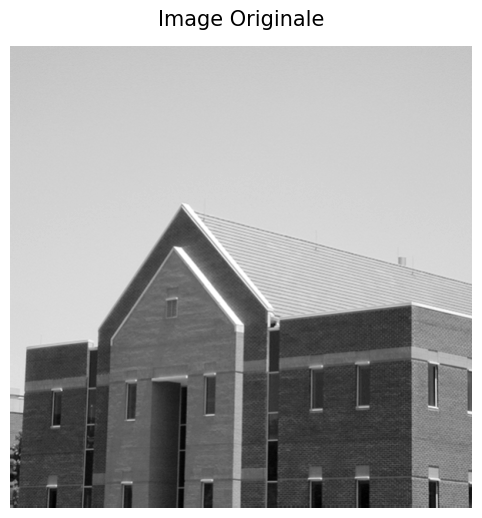

In [ ]:
# Charger image
A = plt.imread('Repo/Data/Maison.tif');
plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off'); plt.show();

### Convolution dans le domaine spatial avec `mode = 'same'`

La fonction `scipy.signal.convolve2d` utilisée avec les paramètres `boundary= ‘fill’, fillvalue=0` ajoute des zéros en bordure de l’image pour passer d’une taille de (M, N) à une taille de (M+2, N+2) avant d’effectuer la convolution. Le paramètre `mode` contrôle la taille de l’image de sortie. Avec `mode = ‘same’`, l’image de sortie est centrée pour obtenir la même taille que l’image d’entrée (M, N). Ainsi pour obtenir l’équivalent de ce traitement dans le domaine fréquentiel il faut :  effectuer une transformée de Fourier (TF) avec (M+2, N+2) échantillons pour obtenir la représentation spectrale de l’image et du filtre, les multiplier, effectuer la TF inverse du résultat, et conserver une région de taille (M,N) **centrée** du résultat (`Bf = Bf[1:M+1, 1:N+1]`). Ceci entraîne un résultat équivalent au filtrage dans le domaine spatial avec les paramètres choisis comme le montre la différence très faible obtenue à l’exemple 1. Si une région de taille (M, N) **non-centrée** est retenue (`Bf = Bf[:M,:N]`), on observe un décalage par rapport au résultat du filtrage dans le domaine spatial comme montré à l’exemple 2.




#### Exemple 1

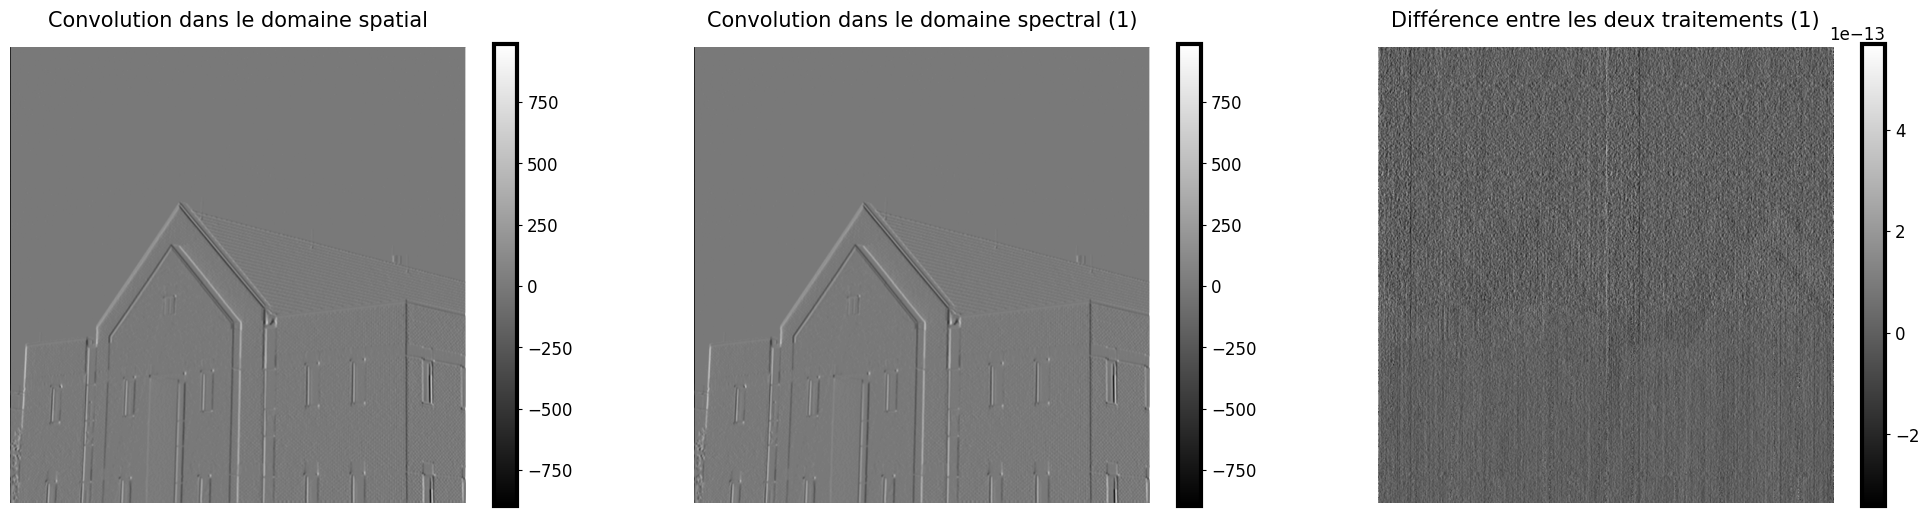

Dimensions de l'image de sortie: (600, 600)


In [ ]:
# Matrice de convolution
h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

# Convolution domaine spatial
Br = signal.convolve2d(A, h, mode='same', boundary='fill', fillvalue=0)

# Convolution domaine fréquentiel
M,N = A.shape
AA = np.fft.fft2(A, (M+2, N+2))
H = np.fft.fft2(h, (M+2, N+2))

Bf = np.real(np.fft.ifft2(AA*H))
Bf = Bf[1:M+1, 1:N+1]

plt.subplot(131);
plt.imshow(Br,cmap='gray'); plt.title('Convolution dans le domaine spatial'); plt.colorbar(); plt.axis('off');
plt.subplot(132);
plt.imshow(Bf,cmap='gray'); plt.title('Convolution dans le domaine spectral (1)'); plt.colorbar(); plt.axis('off');
plt.subplot(133);
plt.imshow(Bf-Br,cmap='gray'); plt.title('Différence entre les deux traitements (1)'); plt.colorbar(); plt.axis('off'); plt.show()
print('Dimensions de l\'image de sortie:', Br.shape)

#### Exemple 2

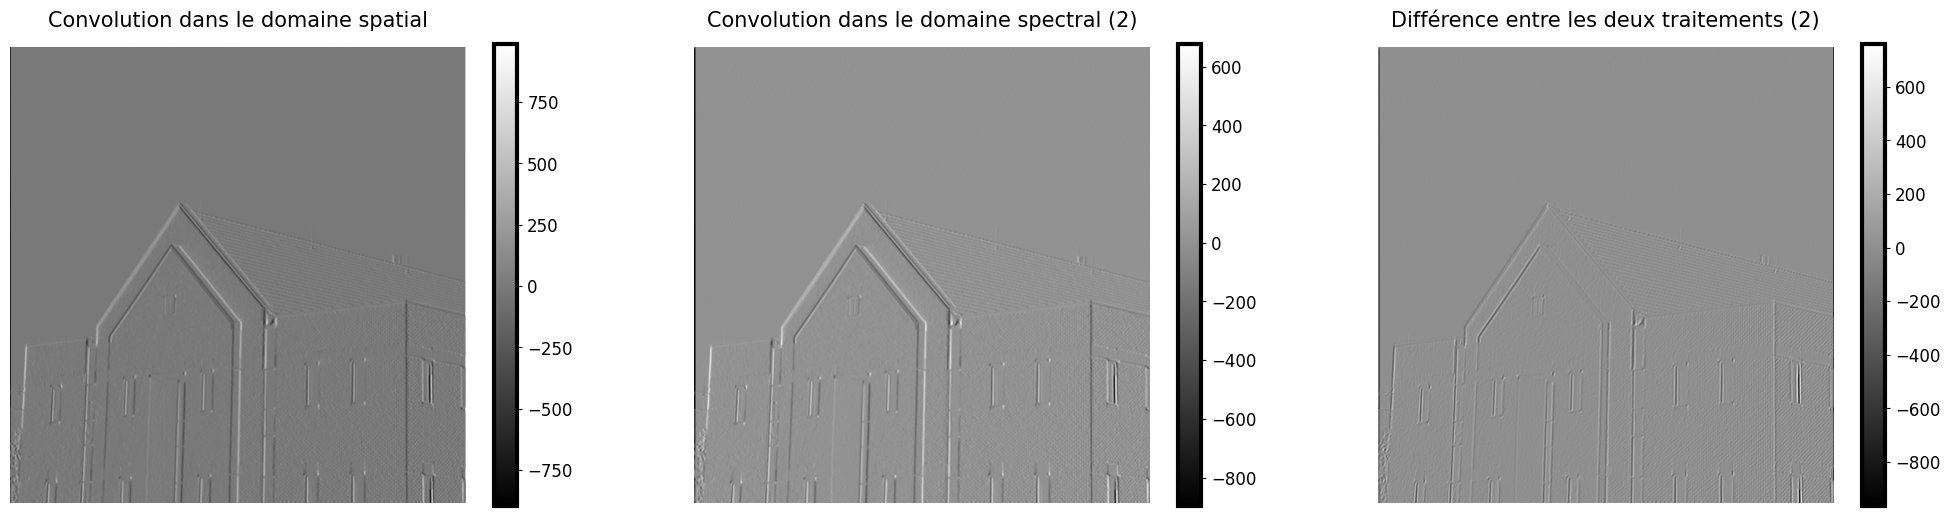

Dimensions de l'image de sortie: (600, 600)


In [ ]:
# Convolution domaine spatial
Br = signal.convolve2d(A, h, mode='same', boundary='fill', fillvalue=0)

# Convolution domaine fréquentiel
Bf = np.real(np.fft.ifft2(AA*H))
Bf = Bf[:M,:N]

plt.subplot(131);
plt.imshow(Br,cmap='gray'); plt.title('Convolution dans le domaine spatial'); plt.colorbar(); plt.axis('off');
plt.subplot(132);
plt.imshow(Bf,cmap='gray'); plt.title('Convolution dans le domaine spectral (2)'); plt.colorbar(); plt.axis('off');
# Différence
plt.subplot(133);
plt.imshow(Bf-Br,cmap='gray'); plt.title('Différence entre les deux traitements (2)'); plt.colorbar(); plt.axis('off'); plt.show()

print('Dimensions de l\'image de sortie:', Br.shape)

## Convolution et prolongement

Dans cet exemple, un filtre de *smoothing* est appliqué dans le domaine spectral sur une image. Sans prolongement par des 0, on peut voir l’effet de *wrapping* aux bords supérieur et gauche de l’image filtrée (l’équivalent de la multiplication dans le domaine fréquentiel et une convolution circulaire dans le domaine spatial). En prolongeant l’image par des 0 et en centrant le résultat du filtrage on obtient une image de même taille que l’image originale sans effet de *wrapping*. Une bordure noire est introduite en périphérie de l’image mais cette bordure est moins importante sur l’image centrée que celle non centrée.

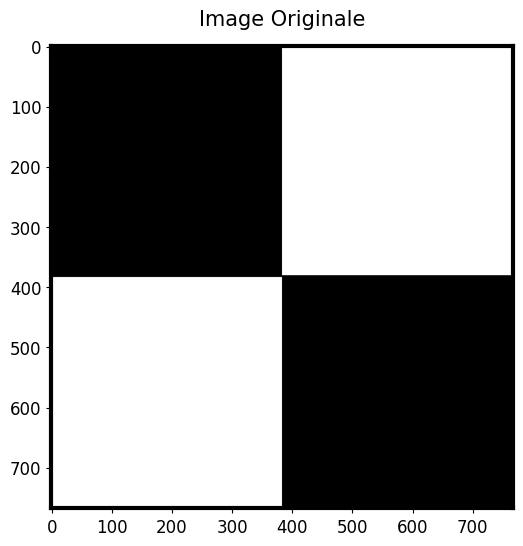

In [ ]:
# Charger image
A = plt.imread('Repo/Data/Carre.tif');
M, N = A.shape

AA = A.copy()
AA[int(np.floor(M/2)):, :int(np.floor(M/2))] =  A[:int(np.floor(M/2)), int(np.floor(M/2)):]
AA[:int(np.floor(M/2)), :int(np.floor(M/2))] =  A[int(np.floor(M/2)):, int(np.floor(M/2)):]

plt.imshow(AA, cmap='gray'); plt.title('Image Originale'); plt.show();

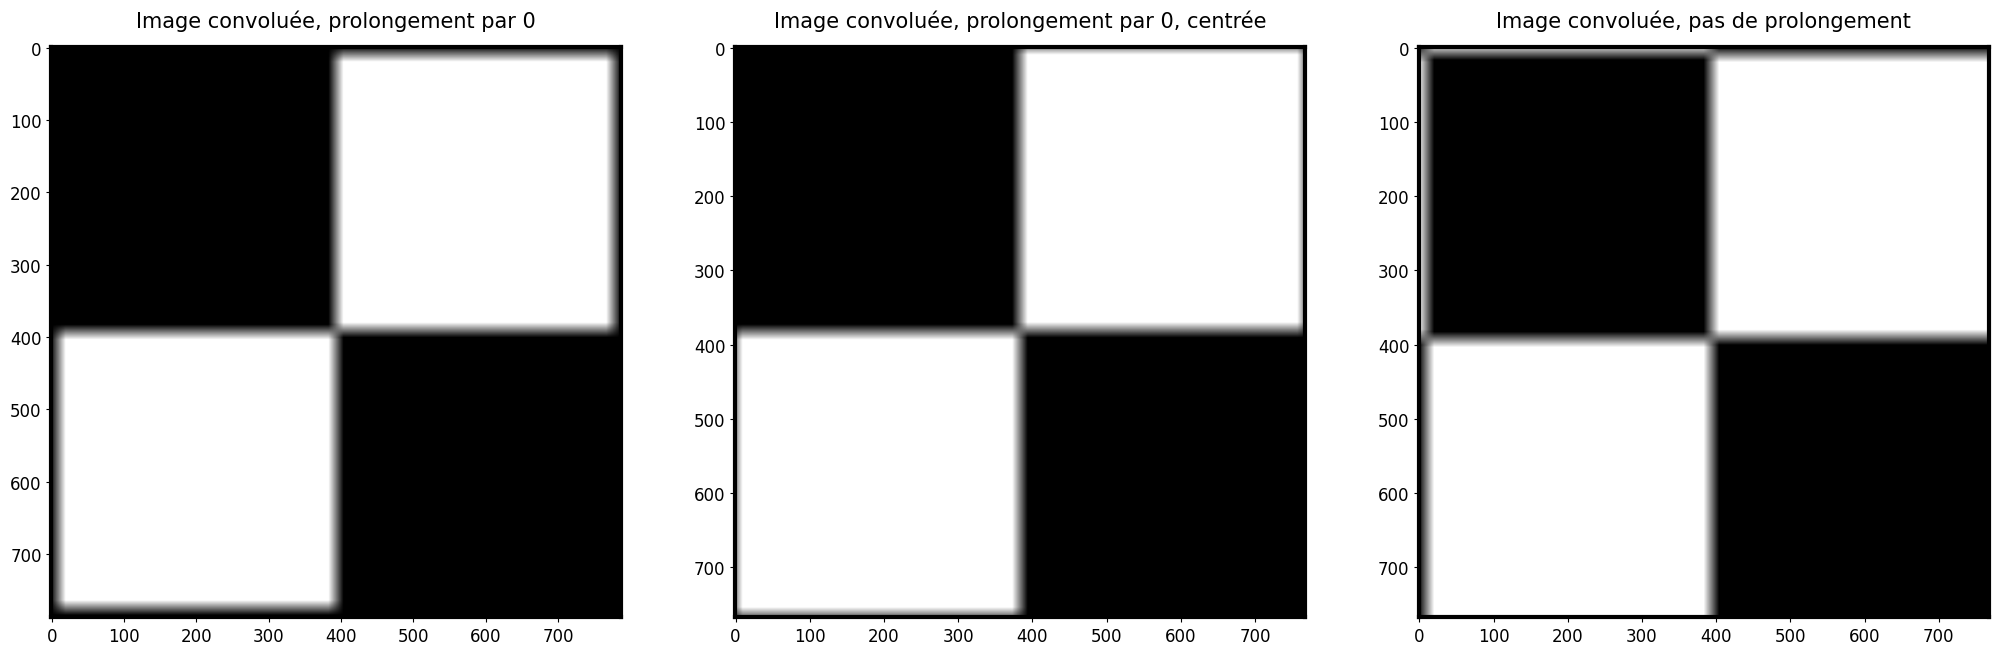

Dimensions de l'image originale: (768, 768)
Dimensions de l'image convoluée et prolongée par des 0: (788, 788)
Dimensions de l'image convoluée, prolongée et centrée: (768, 768)
Dimensions de l'image convoluée non prolongée: (768, 768)


In [ ]:
# Matrice de convolution
h = np.ones((21, 21)) / (21*21)

# Prolongement par 0
AAa = np.fft.fft2(AA, (M+20, N+20));
Ha = np.fft.fft2(h, (M+20, N+20));
Ba = np.fft.ifft2(AAa*Ha);

# Pas de prolongement
AAs = np.fft.fft2(AA);
Hs = np.fft.fft2(h, (M, N));
Bs = np.fft.ifft2(AAs*Hs);

plt.rcParams['figure.figsize'] = (25,8)
plt.subplot(131);
plt.imshow(np.real(Ba),cmap='gray'); plt.title('Image convoluée, prolongement par 0');
plt.subplot(132);
plt.imshow(np.real(Ba[10:M+10, 10:N+10]),cmap='gray'); plt.title('Image convoluée, prolongement par 0, centrée');
plt.subplot(133);
plt.imshow(np.real(Bs),cmap='gray'); plt.title('Image convoluée, pas de prolongement');
plt.show();

print('Dimensions de l\'image originale:', AA.shape)
print('Dimensions de l\'image convoluée et prolongée par des 0:', Ba.shape)
print('Dimensions de l\'image convoluée, prolongée et centrée:', Ba[10:M+10, 10:N+10].shape)
print('Dimensions de l\'image convoluée non prolongée:', Bs.shape)